# 📊🎵 ETL Grammy: Análisis y Premios 🏆📓



### Importación de Librerías y Configuración 📚

- `os`: Utilizada para interactuar con el sistema operativo, como manejar rutas y archivos.
- `shutil`: Permite realizar operaciones de alto nivel con archivos como copiar o mover.
- `pandas` (importado como `pd`): Fundamental para la manipulación y análisis de datos en Python.
- `psycopg2`: Librería para conectar y operar con bases de datos PostgreSQL.
- `matplotlib.pyplot` (importado como `plt`): Usado para crear visualizaciones estáticas, animadas e interactivas.

#### Variables desde Configuración 🛠️

- Importamos variables desde `config_grammy` que incluyen rutas y parámetros de conexión a la base de datos:
  - `RUTA_ORIGEN`, `RUTA_DESTINO`: Rutas para operaciones de archivos.
  - `file_path`, `host`, `dbname`, `user`, `password`, `port`: Utilizados para configurar la conexión a la base de datos.


In [2]:
import os
import shutil
import pandas as pd
import psycopg2
import psycopg2.extras
import matplotlib.pyplot as plt
from config_grammy import RUTA_ORIGEN, RUTA_DESTINO, file_path, host, dbname, user, password, port

ImportError: cannot import name 'host' from 'config_grammy' (c:\Users\cesar\Desktop\platzi\ETL_Workshop_02\NOTEBOOKS\config_grammy.py)

### Manejo de Archivos y Conversión a Excel 📁🔄

1. **Definición de Rutas**:
   - `ruta_origen`: Utiliza `os.path.join` para definir la ruta de origen desde `RUTA_ORIGEN`.
   - `ruta_destino`: Similarmente, define la ruta de destino usando `RUTA_DESTINO`.

2. **Creación de Carpeta de Destino**:
   - Si la carpeta de destino no existe, se crea con `os.makedirs`.

3. **Listado y Copia de Archivos**:
   - Obtiene la lista de archivos en la ruta de origen con `os.listdir`.
   - Copia cada archivo a la carpeta de destino. Durante la copia, se asegura que el contenido se lea y escriba con codificación UTF-8.

4. **Conversión a Excel**:
   - Cada archivo copiado se lee como un DataFrame de pandas.
   - Se convierte y guarda como archivo Excel (`.xlsx`) sin índice.

5. **Impresión de Información de Archivos**:
   - Imprime detalles como el nombre del archivo, cantidad de filas y columnas, y nombres de columnas.

6. **Confirmación Final**:
   - Imprime un mensaje indicando que las copias de archivos han sido creadas y convertidas a formato Excel.

🔗 Esta estructura garantiza que los datos se manejen de forma segura y se almacenen eficientemente en un formato accesible como Excel.


In [ ]:
# Ruta de origen de los archivos
ruta_origen = os.path.join(RUTA_ORIGEN)

# Ruta de destino para las copias
ruta_destino = os.path.join(RUTA_DESTINO)

# Crear la carpeta de destino si no existe
if not os.path.exists(ruta_destino):
    os.makedirs(ruta_destino)

# Obtener la lista de archivos en la ruta de origen
archivos = os.listdir(ruta_origen)

# Copiar cada archivo a la carpeta de destino con codificación UTF-8
for archivo in archivos:
    ruta_archivo_origen = os.path.join(ruta_origen, archivo)
    ruta_archivo_destino = os.path.join(ruta_destino, archivo)
    shutil.copyfile(ruta_archivo_origen, ruta_archivo_destino)
    with open(ruta_archivo_destino, 'r', encoding='utf-8') as f:
        contenido = f.read()
    with open(ruta_archivo_destino, 'w', encoding='utf-8') as f:
        f.write(contenido)

    # Convertir el archivo copiado a formato Excel
    df = pd.read_csv(ruta_archivo_destino)
    excel_file_path = os.path.splitext(ruta_archivo_destino)[0] + '.xlsx'
    df.to_excel(excel_file_path, index=False)

    # Print information about the file
    print("Archivo:", archivo)
    print("Cantidad de filas:", df.shape[0])
    print("Cantidad de columnas:", df.shape[1])
    print("Nombres de las columnas:", df.columns.tolist())
    print("----------------------------------------")

print("Copias de archivos creadas y convertidas a formato Excel en la ruta:", ruta_destino)

Archivo: merged_data.csv
Cantidad de filas: 2714
Cantidad de columnas: 10
Nombres de las columnas: ['Year', 'Category', 'Nominee', 'Artist', 'Winner', 'Track_ID', 'Popularity', 'Danceability', 'Energy', 'Tempo']
----------------------------------------
Archivo: spotify_dataset.csv
Cantidad de filas: 114000
Cantidad de columnas: 21
Nombres de las columnas: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
----------------------------------------
Archivo: the_grammy_awards.csv
Cantidad de filas: 4810
Cantidad de columnas: 10
Nombres de las columnas: ['year', 'title', 'published_at', 'updated_at', 'category', 'nominee', 'artist', 'workers', 'img', 'winner']
----------------------------------------
Copias de archivos creadas y convertidas a formato Excel en la ruta: C

### Carga y Exploración de Datos desde CSV 📊📂

#### Ruta del Archivo CSV 📄

- Se utiliza `os.path.join()` para construir la ruta completa del archivo CSV.

#### Carga de Datos desde CSV 📥

- Se carga el contenido del archivo CSV en un DataFrame de pandas utilizando `pd.read_csv()`.

#### Información del DataFrame 📊🔍

- **Cantidad de Filas y Columnas**: Se imprime la cantidad de filas y columnas en el DataFrame usando `data.shape`.
- **Nombres de las Columnas**: Se muestran los nombres de las columnas del DataFrame mediante `data.columns.tolist()`.
- **Tipos de Datos en las Columnas**: Se imprime el tipo de datos de cada columna con `data.dtypes`.



In [ ]:
# Ruta del archivo CSV
file_path = os.path.join(file_path)

# Cargar los datos del CSV en un DataFrame de pandas
data = pd.read_csv(file_path)

# Imprimir la cantidad de filas y columnas
print("Cantidad de filas:", data.shape[0])
print("Cantidad de columnas:", data.shape[1])

# Imprimir los nombres de los encabezados de las columnas
print("Nombres de los encabezados de las columnas:", data.columns.tolist())

# Imprimir el tipo de datos de cada columna
print("Tipo de datos en cada columna:")
print(data.dtypes)

Cantidad de filas: 4810
Cantidad de columnas: 10
Nombres de los encabezados de las columnas: ['year', 'title', 'published_at', 'updated_at', 'category', 'nominee', 'artist', 'workers', 'img', 'winner']
Tipo de datos en cada columna:
year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object


### Carga de Datos desde CSV a Base de Datos 📊🔗

1. **Ruta al Archivo CSV**:
   - Utiliza la variable `csv_file_path` para almacenar la ruta al archivo CSV.

2. **Conexión a la Base de Datos**:
   - Establece una conexión a la base de datos PostgreSQL utilizando los parámetros de conexión proporcionados.

3. **Gestión de Tablas**:
   - Elimina la tabla `grammy_data` si existe previamente en la base de datos.
   - Crea una nueva tabla `grammy_data` con los tipos de datos correctos para almacenar los datos del CSV.

4. **Carga de Datos desde CSV**:
   - Lee los datos del archivo CSV utilizando `pd.read_csv()` y almacena el resultado en el DataFrame `data`.

5. **Inserción de Datos en la Base de Datos**:
   - Prepara los datos del DataFrame para la inserción en masa.
   - Ejecuta una consulta de inserción en la base de datos utilizando `psycopg2.extras.execute_values()`.

6. **Consulta de Cantidad de Filas**:
   - Realiza una consulta para contar la cantidad de filas insertadas en la tabla.

7. **Gestión de Excepciones y Cierre de Conexión**:
   - Maneja cualquier excepción que pueda ocurrir durante el proceso.
   - Cierra la conexión y el cursor al finalizar el proceso.

8. **Impresión de Resultados**:
   - Imprime mensajes de estado para informar sobre el progreso y los resultados de cada paso.



In [ ]:
# Ruta al archivo CSV
csv_file_path = os.path.join(file_path)

conn = None
cursor = None

try:
    # Conexión a la base de datos
    conn = psycopg2.connect(host=host, dbname=dbname, user=user, password=password, port=port)
    cursor = conn.cursor()
    print("Conexión exitosa a la base de datos.")

    # Eliminar la tabla si existe
    cursor.execute("DROP TABLE IF EXISTS grammy_data;")
    conn.commit()
    print("Tabla 'grammy_data' eliminada exitosamente.")

    # Crear la tabla nuevamente con los tipos de datos correctos
    cursor.execute("""
        CREATE TABLE grammy_data (
            id SERIAL PRIMARY KEY,
            year INT,
            title VARCHAR,
            published_at TIMESTAMP,
            updated_at TIMESTAMP,
            category VARCHAR,
            nominee VARCHAR,
            artist VARCHAR,
            workers VARCHAR,
            img VARCHAR,
            winner BOOLEAN
        );
    """)
    conn.commit()
    print("Tabla 'grammy_data' creada exitosamente.")

    # Cargar datos desde CSV
    data = pd.read_csv(csv_file_path)
    print("Datos cargados desde el archivo CSV.")

    # Preparar datos para la inserción en masa
    tuples = [tuple(x) for x in data.to_numpy()]
    cols = ','.join(list(data.columns))
    query = "INSERT INTO grammy_data ({}) VALUES %s".format(cols)
    psycopg2.extras.execute_values(cursor, query, tuples)
    conn.commit()
    print("Datos insertados en la base de datos correctamente.")

    # Consultar cantidad de filas y datos
    cursor.execute("SELECT COUNT(*) FROM grammy_data;")
    rows_count = cursor.fetchone()[0]
    print(f"Total de filas en la tabla: {rows_count}")

except Exception as e:
    print("Error:", e)
finally:
    if cursor is not None:
        cursor.close()
    if conn is not None:
        conn.close()
    print("Conexión cerrada.")


Conexión exitosa a la base de datos.
Tabla 'grammy_data' eliminada exitosamente.
Tabla 'grammy_data' creada exitosamente.
Datos cargados desde el archivo CSV.
Datos insertados en la base de datos correctamente.
Total de filas en la tabla: 4810
Conexión cerrada.


### Conectar a la base de datos 📊

Se utiliza la biblioteca `psycopg2` para conectar a la base de datos PostgreSQL.

### Crear un DataFrame desde una consulta SQL 📋

Se ejecuta una consulta SQL para seleccionar los primeros 30 registros de la tabla `grammy_data`. Los resultados se cargan en un DataFrame de Pandas.

### Mostrar el DataFrame 📋

Se imprime el DataFrame que contiene los resultados de la consulta.

### Cerrar la conexión a la base de datos 🔌

Se cierra la conexión a la base de datos una vez que se han realizado todas las operaciones.


In [ ]:
# Conectar a la base de datos
conn = psycopg2.connect(host=host, dbname=dbname, user=user, password=password, port=port)

try:
    # Crear un DataFrame directamente desde una consulta SQL
    query = "SELECT * FROM grammy_data LIMIT 30;"
    data = pd.read_sql(query, conn)
    
    # Mostrar el DataFrame
    print(data)

except Exception as e:
    print("Error realizando consulta o mostrando datos:", e)

finally:
    # Cerrar la conexión a la base de datos
    conn.close()


      id  year                              title        published_at          updated_at                          category                                   nominee                               artist                                                                                                                                                                                                                                                                           workers                                                                                                                                                   img  winner
0      1  2019  62nd Annual GRAMMY Awards  (2019) 2020-05-19 05:10:28 2020-05-19 05:10:28                Record Of The Year                                   Bad Guy                        Billie Eilish                                                                                                                                                                Fin

C:\Users\cesar\AppData\Local\Temp\ipykernel_6600\1824458750.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


### Conectar a la base de datos 📊

Se utiliza la biblioteca `psycopg2` para conectar a la base de datos PostgreSQL.

### Crear un DataFrame desde una consulta SQL 📋

Se ejecuta una consulta SQL para seleccionar los primeros 30 registros de la tabla `grammy_data`. Los resultados se cargan en un DataFrame de Pandas.

### Mejorar la presentación de la tabla en la consola 🖥️

Se ajustan varias opciones de visualización del DataFrame para mejorar su presentación en la consola:
- Se muestran todas las columnas.
- Se ajusta el ancho de la visualización para que sea más legible.
- Se muestra el contenido completo de cada celda.
- Se ajusta la precisión de los decimales.

### Mostrar el DataFrame 📋

Se imprime el DataFrame en la consola con las mejoras de visualización aplicadas para una mejor legibilidad.

### Cerrar la conexión a la base de datos 🔌

Se cierra la conexión a la base de datos una vez que se han realizado todas las operaciones.


In [ ]:
# Conectar a la base de datos
conn = psycopg2.connect(host=host, dbname=dbname, user=user, password=password, port=port)

try:
    # Crear un DataFrame directamente desde una consulta SQL
    query = "SELECT * FROM grammy_data LIMIT 30;"
    data = pd.read_sql(query, conn)
    
    # Mejorar la presentación de la tabla en la consola
    pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
    pd.set_option('display.width', 1000)        # Ajustar el ancho de la visualización
    pd.set_option('display.max_colwidth', None) # Mostrar contenido completo de cada celda
    pd.set_option('display.precision', 2)       # Ajustar la precisión de los decimales
    
    # Mostrar el DataFrame
    print(data.to_string(index=False))  # Elimina la columna de índice para una visualización más limpia

except Exception as e:
    print("Error realizando consulta o mostrando datos:", e)

finally:
    # Cerrar la conexión a la base de datos
    conn.close()


  id  year                             title        published_at          updated_at                         category                                  nominee                              artist                                                                                                                                                                                                                                                                          workers                                                                                                                                                  img  winner
   1  2019 62nd Annual GRAMMY Awards  (2019) 2020-05-19 05:10:28 2020-05-19 05:10:28               Record Of The Year                                  Bad Guy                       Billie Eilish                                                                                                                                                               Finneas O'Connell, pro

C:\Users\cesar\AppData\Local\Temp\ipykernel_6600\2498663124.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


### Conectar a la base de datos 📊

Se utiliza la biblioteca `psycopg2` para establecer una conexión con la base de datos PostgreSQL.

### Obtener todos los datos de la tabla 📋

Se ejecuta una consulta SQL para seleccionar todos los datos de la tabla `grammy_data`. Los resultados se cargan en un DataFrame de Pandas.

### Encontrar duplicados 🔍

Se identifican las filas duplicadas en el DataFrame utilizando el método `duplicated()` de Pandas. Se configura el parámetro `keep=False` para marcar todas las filas duplicadas.

### Configurar la visualización de pandas 🖥️

Se ajustan varias opciones de visualización de Pandas para mostrar la tabla de manera óptima, incluyendo mostrar todas las columnas, ajustar el ancho de la visualización, mostrar el contenido completo de cada celda y ajustar la precisión de los decimales.

### Mostrar las filas duplicadas 📋

Se verifica si existen filas duplicadas en el DataFrame. Si no se encuentran duplicados, se muestra un mensaje indicando que no se encontraron filas duplicadas. En caso contrario, se imprime una tabla con las filas duplicadas.

### Cerrar la conexión a la base de datos 🔌

Finalmente, se cierra la conexión a la base de datos PostgreSQL una vez que se han completado todas las operaciones.


In [ ]:
# Conectar a la base de datos
conn = psycopg2.connect(host=host, dbname=dbname, user=user, password=password, port=port)

try:
    # Obtener todos los datos de la tabla
    query = "SELECT * FROM grammy_data;"
    data = pd.read_sql(query, conn)
    
    # Encontrar duplicados
    duplicates = data[data.duplicated(keep=False)]  # 'keep=False' marca todas las duplicadas
    
    # Configurar la visualización de pandas para mostrar la tabla de manera óptima
    pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
    pd.set_option('display.width', 1000)        # Ajustar el ancho de la visualización
    pd.set_option('display.max_colwidth', None) # Mostrar contenido completo de cada celda
    pd.set_option('display.precision', 2)       # Ajustar la precisión de los decimales

    # Mostrar las filas duplicadas
    if duplicates.empty:
        print("No se encontraron filas duplicadas.")
    else:
        print("Filas duplicadas encontradas:")
        print(duplicates.to_string(index=False))  # Mostrar las filas duplicadas sin el índice

except Exception as e:
    print("Error al realizar la consulta o al mostrar los datos:", e)

finally:
    # Cerrar la conexión a la base de datos
    conn.close()


No se encontraron filas duplicadas.


C:\Users\cesar\AppData\Local\Temp\ipykernel_6600\2211236737.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


### Conectar a la base de datos 📊

Intenta establecer una conexión con la base de datos PostgreSQL utilizando los parámetros proporcionados.

- Si la conexión es exitosa, se imprime un mensaje indicando que la conexión se estableció correctamente.
- Si ocurre algún error durante la conexión, se imprime un mensaje de error con detalles sobre la excepción.


In [ ]:
# Conectar a la base de datos
try:
    conn = psycopg2.connect(host=host, dbname=dbname, user=user, password=password, port=port)
    cursor = conn.cursor()
    print("Conexión a la base de datos establecida exitosamente.")
except Exception as e:
    print("Error al conectar a la base de datos:", e)


Conexión a la base de datos establecida exitosamente.


### Consulta de Nominaciones y Ganadores 🏆

Se ejecuta una consulta SQL para obtener el total de nominaciones y el total de ganadores de los premios Grammy desde la tabla `grammy_data`. Se utiliza un cursor para ejecutar la consulta en la base de datos.

### Manejo de Resultados ✨

Se obtiene el resultado de la consulta y se almacena en la variable `result`. Luego, se imprime el total de nominaciones y el total de ganadores utilizando f-strings en Python para formatear la salida.

### Manejo de Errores ❌

Se utiliza un bloque `try-except` para manejar cualquier excepción que pueda ocurrir durante la ejecución de la consulta. Si se produce un error, se imprime un mensaje indicando el problema.


In [ ]:
try:
    cursor.execute("""
    SELECT COUNT(*) AS total_nominations, 
           SUM(CASE WHEN winner THEN 1 ELSE 0 END) AS total_winners
    FROM grammy_data;
    """)
    result = cursor.fetchone()
    print(f"Total de nominaciones: {result[0]}, Total de ganadores: {result[1]}")
except Exception as e:
    print("Error al realizar consulta de nominaciones y ganadores:", e)


Total de nominaciones: 4810, Total de ganadores: 4810


### Ejecutar consulta SQL 📊

Se utiliza un cursor para ejecutar una consulta SQL que cuenta el número total de nominaciones y la suma de ganadores en la tabla `grammy_data`.

### Mostrar resultados y crear gráfico de torta 📊🍰

Se obtienen los resultados de la consulta y se calcula el número de no ganadores. Luego, se preparan los datos para crear un gráfico de torta que muestre la proporción de ganadores y no ganadores en los premios Grammy. Los datos se visualizan utilizando la biblioteca Matplotlib.

### Manejar errores 🚫

Se incluye un bloque try-except para manejar cualquier error que pueda ocurrir durante la ejecución de la consulta SQL o la creación del gráfico. Si ocurre un error, se imprime un mensaje de error.


Total de nominaciones: 4810, Total de ganadores: 4810, No ganadores: 0


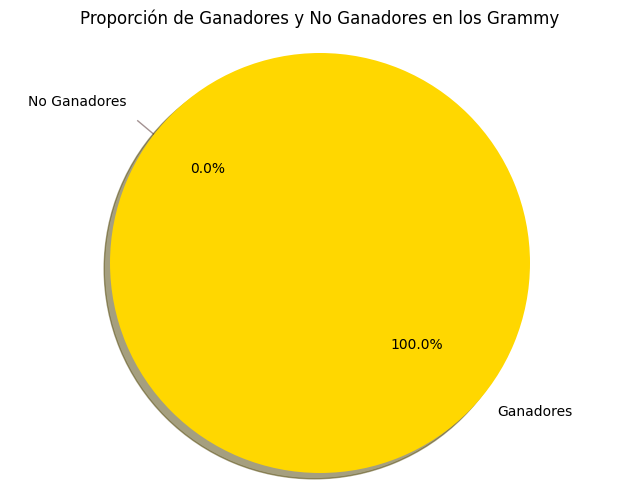

In [ ]:

try:
    # Ejecutar consulta SQL
    cursor.execute("""
    SELECT COUNT(*) AS total_nominations, 
           SUM(CASE WHEN winner THEN 1 ELSE 0 END) AS total_winners
    FROM grammy_data;
    """)
    result = cursor.fetchone()
    total_nominations = result[0]
    total_winners = result[1]
    total_losers = total_nominations - total_winners  # Calcula el número de no ganadores
    print(f"Total de nominaciones: {total_nominations}, Total de ganadores: {total_winners}, No ganadores: {total_losers}")

    # Datos para el gráfico de torta
    labels = ['Ganadores', 'No Ganadores']
    sizes = [total_winners, total_losers]
    colors = ['gold', 'lightcoral']
    explode = (0.1, 0)  # resalta los ganadores

    # Crear el gráfico de torta
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Proporción de Ganadores y No Ganadores en los Grammy')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

except Exception as e:
    print("Error al realizar consulta o al graficar los datos:", e)

### Consultar nominaciones por año 📅

Se ejecuta una consulta SQL para contar el número de nominaciones por año en la tabla `grammy_data`. Los resultados se ordenan por año.

### Obtener los datos de los años y las nominaciones 📊

Los datos obtenidos de la consulta se almacenan en la variable `years_data` mediante el método `fetchall()` del cursor. Luego, se itera sobre estos datos para imprimir el año y el número de nominaciones correspondientes.

### Manejar excepciones ⚠️

Se utiliza un bloque `try-except` para manejar cualquier excepción que pueda ocurrir durante la ejecución de la consulta. Si se produce un error, se imprime un mensaje de error indicando la naturaleza del problema.


In [ ]:
try:
    cursor.execute("""
    SELECT year, COUNT(*) AS nominations
    FROM grammy_data
    GROUP BY year
    ORDER BY year;
    """)
    years_data = cursor.fetchall()
    for year, count in years_data:
        print(f"Año: {year}, Nominaciones: {count}")
except Exception as e:
    print("Error al realizar consulta de nominaciones por año:", e)


Año: 1958, Nominaciones: 28
Año: 1959, Nominaciones: 35
Año: 1960, Nominaciones: 39
Año: 1961, Nominaciones: 41
Año: 1962, Nominaciones: 39
Año: 1963, Nominaciones: 42
Año: 1964, Nominaciones: 47
Año: 1965, Nominaciones: 47
Año: 1966, Nominaciones: 43
Año: 1967, Nominaciones: 50
Año: 1968, Nominaciones: 40
Año: 1969, Nominaciones: 45
Año: 1970, Nominaciones: 43
Año: 1971, Nominaciones: 44
Año: 1972, Nominaciones: 47
Año: 1973, Nominaciones: 46
Año: 1974, Nominaciones: 48
Año: 1975, Nominaciones: 48
Año: 1976, Nominaciones: 49
Año: 1977, Nominaciones: 52
Año: 1978, Nominaciones: 52
Año: 1979, Nominaciones: 58
Año: 1980, Nominaciones: 60
Año: 1981, Nominaciones: 61
Año: 1982, Nominaciones: 63
Año: 1983, Nominaciones: 68
Año: 1984, Nominaciones: 69
Año: 1985, Nominaciones: 72
Año: 1986, Nominaciones: 69
Año: 1987, Nominaciones: 71
Año: 1988, Nominaciones: 76
Año: 1989, Nominaciones: 75
Año: 1990, Nominaciones: 77
Año: 1991, Nominaciones: 79
Año: 1992, Nominaciones: 81
Año: 1993, Nominacio

### Establecer conexión a la base de datos 📊

Intenta conectar a la base de datos PostgreSQL utilizando los parámetros proporcionados.

### Ejecutar consulta SQL para obtener el número de nominaciones por año 📋

Se ejecuta una consulta SQL para obtener el número de nominaciones por año de la tabla `grammy_data`. Los resultados se almacenan en una lista de tuplas llamada `years_data`.

### Graficar los datos 📊

Se utiliza Matplotlib para crear un gráfico de barras que muestra el número de nominaciones por año. Los años se representan en el eje X y el número de nominaciones en el eje Y. Se añaden etiquetas de valores en cada barra para una mejor visualización.

### Mostrar el gráfico 📊

Se muestra el gráfico generado con la distribución de nominaciones por año en los Grammy Awards.

### Manejo de errores 🔍

En caso de que ocurra algún error durante el proceso, se imprime un mensaje indicando el problema.


Conexión a la base de datos establecida exitosamente.


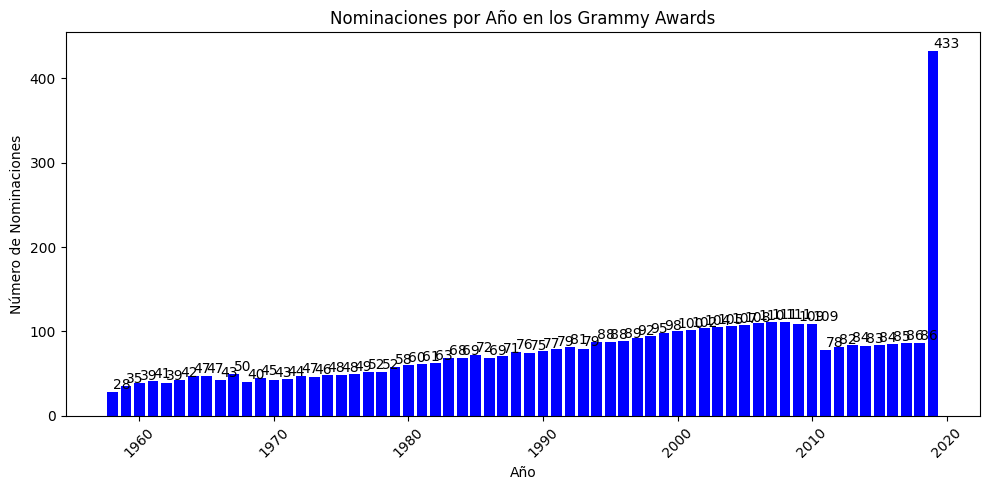

In [ ]:
try:
    conn = psycopg2.connect(host=host, dbname=dbname, user=user, password=password, port=port)
    cursor = conn.cursor()
    print("Conexión a la base de datos establecida exitosamente.")

    # Ejecutar consulta SQL para obtener el número de nominaciones por año
    cursor.execute("""
    SELECT year, COUNT(*) AS nominations
    FROM grammy_data
    GROUP BY year
    ORDER BY year;
    """)
    years_data = cursor.fetchall()

    # Separar los datos en dos listas para facilitar la graficación
    years = [row[0] for row in years_data]
    nominations = [row[1] for row in years_data]

    # Crear un gráfico de barras
    plt.figure(figsize=(10, 5))  # Tamaño de la figura
    bars = plt.bar(years, nominations, color='blue')
    plt.xlabel('Año')  # Etiqueta del eje X
    plt.ylabel('Número de Nominaciones')  # Etiqueta del eje Y
    plt.title('Nominaciones por Año en los Grammy Awards')  # Título del gráfico
    plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejor visualización

    # Añadir etiquetas de valores en cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

    plt.tight_layout()  # Ajustar automáticamente los parámetros de la figura para dar espacio a las etiquetas

    # Mostrar el gráfico
    plt.show()

except Exception as e:
    print("Error al realizar consulta de nominaciones por año:", e)

### Consulta de Categorías Más Frecuentes 🏆

Se ejecuta una consulta SQL para contar el número de nominaciones en la tabla `grammy_data`, agrupadas por categoría. Las cinco categorías con el mayor número de nominaciones se seleccionan y se muestran.

### Ejecutar la Consulta SQL 📊

Se utiliza un cursor para ejecutar la consulta SQL en la base de datos.

### Obtener Resultados y Mostrar Categorías 📋

Se obtienen los resultados de la consulta y se almacenan en la variable `categories`. Luego, se imprime un encabezado indicando que se mostrarán las categorías más frecuentes. Se itera sobre los resultados y se imprime el nombre de la categoría junto con el número de nominaciones.

### Manejo de Errores 🛑

Se incluye una cláusula `try-except` para manejar cualquier error que pueda ocurrir durante la ejecución de la consulta. Si se produce un error, se imprime un mensaje indicando el problema.


In [ ]:
try:
    cursor.execute("""
    SELECT category, COUNT(*) AS count
    FROM grammy_data
    GROUP BY category
    ORDER BY count DESC
    LIMIT 5;
    """)
    categories = cursor.fetchall()
    print("Categorías más frecuentes:")
    for category, count in categories:
        print(f"Categoría: {category}, Número de Nominaciones: {count}")
except Exception as e:
    print("Error al realizar consulta de categorías:", e)


Categorías más frecuentes:
Categoría: Song Of The Year, Número de Nominaciones: 70
Categoría: Record Of The Year, Número de Nominaciones: 69
Categoría: Album Of The Year, Número de Nominaciones: 66
Categoría: Best Opera Recording, Número de Nominaciones: 64
Categoría: Best Album Notes, Número de Nominaciones: 63


### Consulta de Categorías Más Frecuentes 🏆

Se ejecuta una consulta SQL para contar el número de nominaciones en la tabla `grammy_data`, agrupadas por categoría. Las cinco categorías con el mayor número de nominaciones se seleccionan y se muestran.

### Ejecutar la Consulta SQL 📊

Se utiliza un cursor para ejecutar la consulta SQL en la base de datos.

### Obtener Resultados y Mostrar Categorías 📋

Se obtienen los resultados de la consulta y se almacenan en la variable `categories`. Luego, se imprime un encabezado indicando que se mostrarán las categorías más frecuentes. Se itera sobre los resultados y se imprime el nombre de la categoría junto con el número de nominaciones.

### Manejo de Errores 🛑

Se incluye una cláusula `try-except` para manejar cualquier error que pueda ocurrir durante la ejecución de la consulta. Si se produce un error, se imprime un mensaje indicando el problema.


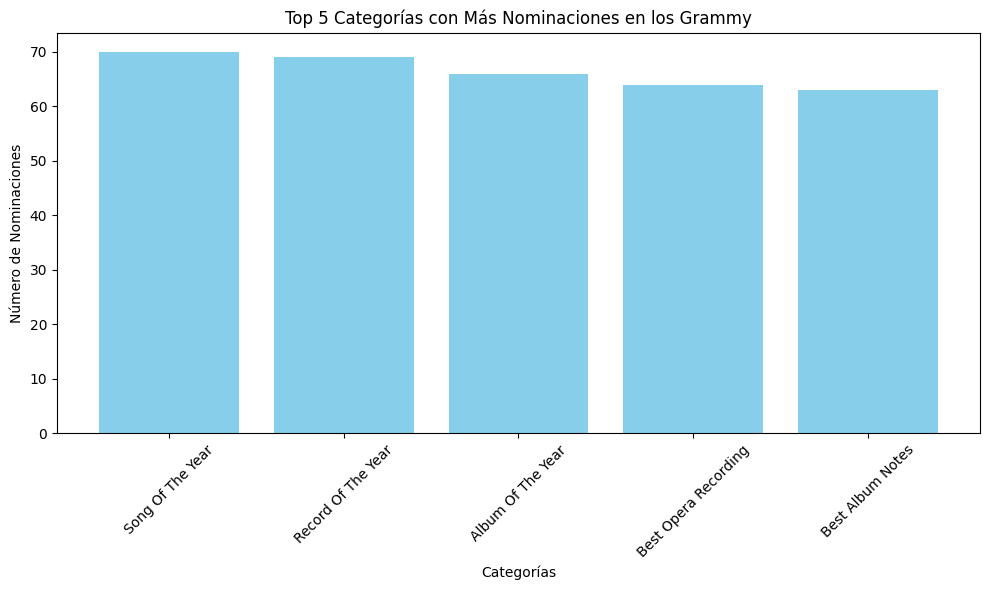

In [ ]:
try:
    # Ejecutar consulta SQL
    cursor.execute("""
    SELECT category, COUNT(*) AS count
    FROM grammy_data
    GROUP BY category
    ORDER BY count DESC
    LIMIT 5;
    """)
    categories = cursor.fetchall()

    # Preparar datos para la visualización
    categories_list = [category[0] for category in categories]  # Nombres de categorías
    counts = [count[1] for count in categories]  # Conteo de nominaciones

    # Crear gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(categories_list, counts, color='skyblue')
    plt.xlabel('Categorías')
    plt.ylabel('Número de Nominaciones')
    plt.title('Top 5 Categorías con Más Nominaciones en los Grammy')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama para dar espacio a las etiquetas
    plt.show()

except Exception as e:
    print("Error al realizar consulta de categorías:", e)

In [ ]:
try:
    cursor.execute("""
    SELECT artist, COUNT(*) AS nominations
    FROM grammy_data
    GROUP BY artist
    ORDER BY nominations DESC
    LIMIT 10;
    """)
    artists = cursor.fetchall()
    print("Artistas con más nominaciones:")
    for artist, nominations in artists:
        print(f"Artista: {artist}, Nominaciones: {nominations}")
except Exception as e:
    print("Error al realizar consulta de artistas:", e)


Artistas con más nominaciones:
Artista: NaN, Nominaciones: 1840
Artista: (Various Artists), Nominaciones: 66
Artista: U2, Nominaciones: 18
Artista: Aretha Franklin, Nominaciones: 16
Artista: Ella Fitzgerald, Nominaciones: 13
Artista: Bruce Springsteen, Nominaciones: 13
Artista: Beyoncé, Nominaciones: 13
Artista: Stevie Wonder, Nominaciones: 13
Artista: Jimmy Sturr, Nominaciones: 12
Artista: Dixie Chicks, Nominaciones: 12


### Realizar consulta SQL y visualización de datos 📊

Se intenta ejecutar una consulta SQL para seleccionar los 10 artistas con más nominaciones de la tabla `grammy_data`. Luego, se preparan los datos para la visualización: se extraen los nombres de los artistas y el número de nominaciones de los resultados de la consulta. 

### Crear un gráfico de barras 📊

Se utiliza Matplotlib para crear un gráfico de barras horizontales que muestra el número de nominaciones para cada artista. Los artistas se muestran en el eje y y el número de nominaciones en el eje x. Se establece un título para el gráfico y se invierte el eje y para que el artista con más nominaciones aparezca en la parte superior.

### Manejo de errores y excepciones ⚠️

Si ocurre algún error durante la ejecución de la consulta SQL o la visualización de datos, se captura la excepción y se imprime un mensaje de error.


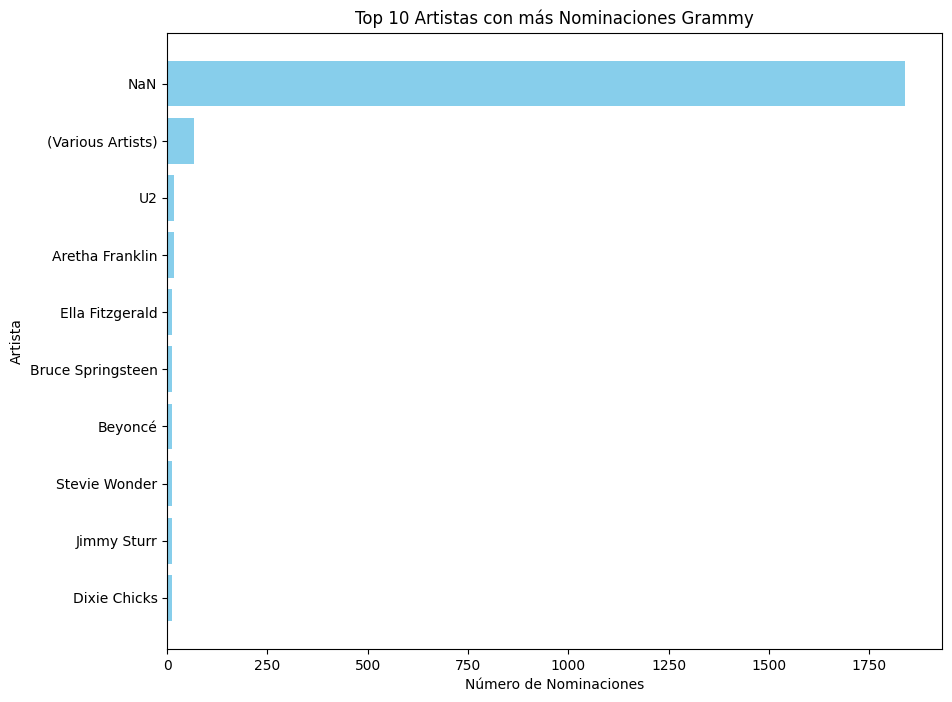

In [ ]:
try:
    # Realizar la consulta SQL
    cursor.execute("""
    SELECT artist, COUNT(*) AS nominations
    FROM grammy_data
    GROUP BY artist
    ORDER BY nominations DESC
    LIMIT 10;
    """)
    artists = cursor.fetchall()
    
    # Preparar los datos para la visualización
    artist_names = [artist[0] for artist in artists]
    nominations = [artist[1] for artist in artists]
    
    # Crear un gráfico de barras
    plt.figure(figsize=(10, 8))
    plt.barh(artist_names, nominations, color='skyblue')
    plt.xlabel('Número de Nominaciones')
    plt.ylabel('Artista')
    plt.title('Top 10 Artistas con más Nominaciones Grammy')
    plt.gca().invert_yaxis()  # Invertir el eje y para que el artista con más nominaciones esté arriba
    plt.show()

except Exception as e:
    print("Error al realizar consulta de artistas:", e)

### Cerrar conexión y cursor 🔌

Se utiliza `cursor.close()` para cerrar el cursor utilizado para ejecutar consultas en la base de datos.

Luego, `conn.close()` se emplea para cerrar la conexión a la base de datos.

Finalmente, se imprime "Conexión a la base de datos cerrada." para confirmar que la conexión se ha cerrado correctamente.


In [ ]:
# Cerrar conexión y cursor
cursor.close()
conn.close()
print("Conexión a la base de datos cerrada.")


Conexión a la base de datos cerrada.
